## Integration Konventioneller Kraftwerksflotten

ohne wind und solar


In [95]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [96]:
url= "https://raw.githubusercontent.com/wri/global-power-plant-database/refs/heads/master/output_database/global_power_plant_database.csv"
#datei konnte nicht aus tu hub ausgelesen werden da es keine dowload file war -> option 1 local einlesen, option2 aus git hub 

conv_energy = pd.read_csv(url, low_memory=False)
conv_energy.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [97]:
conv_energy_aut = conv_energy.loc[conv_energy["country"]== "AUT"]
conv_energy_aut["geometry"] = gpd.points_from_xy(conv_energy_aut["longitude"], conv_energy_aut["latitude"])
conv_energy_aut

/var/folders/ld/sgdyq0157c3f0qg85wvlkt4c0000gn/T/ipykernel_12269/1292585369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conv_energy_aut["geometry"] = gpd.points_from_xy(conv_energy_aut["longitude"], conv_energy_aut["latitude"])


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
822,AUT,Austria,Abwinden-Asten,WRI1005149,168.0,48.2480,14.4305,Hydro,NaN,NaN,...,911.14,714.06,943.51,942.57,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (14.4305 48.248)
823,AUT,Austria,Altenmarkt,WRI1005150,26.0,46.7667,15.5500,Hydro,NaN,NaN,...,111.66,75.33,79.88,75.33,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (15.55 46.7667)
824,AUT,Austria,Arnstein,WRI1005153,30.0,47.0167,15.1667,Hydro,NaN,NaN,...,111.56,84.33,84.56,84.33,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (15.1667 47.0167)
825,AUT,Austria,Aschach,WRI1005154,287.0,48.3853,14.0230,Hydro,NaN,NaN,...,1504.16,1113.44,1566.00,1116.03,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (14.023 48.3853)
826,AUT,Austria,Bischofshofen,WRI1005155,16.0,47.4070,13.2205,Hydro,NaN,NaN,...,86.43,60.68,62.66,62.62,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (13.2205 47.407)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,AUT,Austria,Wind Park Bruck an der Leitha,WRI1005268,9.0,48.0338,16.7264,Wind,NaN,NaN,...,17.21,16.07,16.61,13.24,WIND-V1,WIND-V1,WIND-V1,WIND-V1,WIND-V1,POINT (16.7264 48.0338)
921,AUT,Austria,Wind Park Hollern II,WRI1005270,37.0,48.0900,16.8440,Wind,NaN,NaN,...,NaN,104.39,111.46,107.26,NO-ESTIMATION,NO-ESTIMATION,WIND-V1,WIND-V1,WIND-V1,POINT (16.844 48.09)
922,AUT,Austria,Wind Park Petronell-Carnuntum II,WRI1005271,21.0,48.0900,16.8440,Wind,NaN,NaN,...,NaN,NaN,NaN,47.82,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (16.844 48.09)
923,AUT,Austria,Windpark Bruck-Göttlesbrunn,WRI1005269,21.0,48.0950,16.8900,Wind,NaN,NaN,...,NaN,NaN,63.37,70.84,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,WIND-V1,WIND-V1,POINT (16.89 48.095)


In [99]:
relevant_cols = ["primary_fuel", "capacity_mw", "geometry"]
conv_energy_aut = conv_energy_aut[relevant_cols]
conv_energy_aut
type(conv_energy_aut)


pandas.core.frame.DataFrame

AttributeError: 'Series' object has no attribute 'crs'

/opt/anaconda3/envs/esm-ws-25-26/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


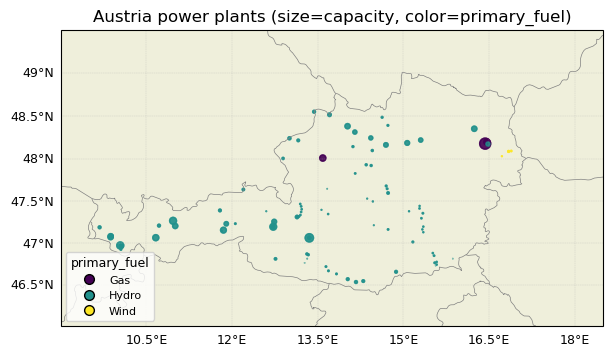

In [85]:
df = conv_energy_aut.dropna(subset=["longitude", "latitude"]).copy()

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.Mercator())  # <- display projection

ax.set_extent([9, 18.5, 46, 49.5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, color="gray")

gl = ax.gridlines(draw_labels=True, linewidth=0.3, linestyle="--", alpha=0.6)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 9}
gl.ylabel_style = {"size": 9}

ax.scatter(
    df["longitude"], df["latitude"],
    s=df["capacity_mw"].fillna(0) / 20,      # size ~ capacity
    c=df["primary_fuel"].astype("category").cat.codes,  # color ~ fuel (simple)
    transform=ccrs.PlateCarree(),
    alpha=0.7
)

cats = df["primary_fuel"].fillna("Unknown").astype("category")
codes = cats.cat.codes

sc = ax.scatter(
    df["longitude"], df["latitude"],
    s=df["capacity_mw"].fillna(0) / 20,
    c=codes,
    transform=ccrs.PlateCarree(),
    alpha=0.7
)
# Legende (einfach, ohne Colorbar): Dummy-Handles je Kategorie
handles = [
    plt.Line2D([0], [0], marker="o", linestyle="", markersize=7,
               markerfacecolor=sc.cmap(sc.norm(i)), markeredgecolor="k", label=lab)
    for i, lab in enumerate(cats.cat.categories)
]

ax.legend(handles=handles, title="primary_fuel", loc="lower left", fontsize=8, title_fontsize=9)

plt.title("Austria power plants (size=capacity, color=primary_fuel)")
plt.show()

In [86]:
#daraus status plots für status quo intro slides 